# Using Historical Data to Predict Batting Success: Step 5 - OPS Modelling

Authored by: Donna J. Harris (994042890)

Email: harr2890@mylaurier.ca

For: CP640 Machine Learning (S22) with Professor Elham Harirpoush

## Notebook Series

Just a word about the presentation of this project code.

The code is organized into a series of locally executed Jupyter notebooks, organized by step and needing to be executed in sequence. This is `harr2890_project_step5_ops_modelling`, the fifth of XXXXX notebooks.  TODO

## *Step 5 - Exploration and Modelling for an OPS Approach*

word words word TODO


## Environment Setup

Import and establish environment for our work, including showing all dataframe column values.

In [18]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Pre-Conditions

Steps 1 and 4 must be run completely before running this notebook.

The `data` folder must exist with the following prepared data files:
- `./data/step4_alldata.csv`
- `./data/step4_pre_2000.csv`
- `./data/step4_from_2000.csv`

##  Loading Prepared Data Files

In [2]:
alldata_csv = "./data/step4_alldata.csv"
alldata = pd.read_csv(alldata_csv)
alldata

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,Career AVG,Career SLG,Career OBP,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y6,OPS Y7,OPS Y8,OPS Y9,OPS Y10,AVG Y1,AVG Y2,AVG Y3,AVG Y4,AVG Y5,AVG Y6,AVG Y7,AVG Y8,AVG Y9,AVG Y10
0,willeed01,Ed Willett,704,649,56,129,25,10,5,68,25,174,6,24,0,10,0.198767,0.291217,0.235294,0.526511,0.000000,0.219780,0.367510,0.496266,0.379030,0.774655,0.456006,0.692935,0.621154,0.533333,0.000000,0.076923,0.164179,0.190909,0.134146,0.268293,0.165217,0.282609,0.234375,0.200000
1,daussho01,Hooks Dauss,1324,1125,107,212,41,15,6,112,145,288,8,41,0,15,0.188444,0.267556,0.285603,0.553158,1.000000,0.560802,0.578379,0.470550,0.731898,0.400920,0.559740,0.379742,0.542872,0.634387,0.250000,0.177215,0.216495,0.145631,0.222222,0.126437,0.181818,0.144330,0.170732,0.261364
2,coopewi01,Wilbur Cooper,1320,1232,111,295,34,18,6,103,46,139,4,35,0,15,0.239448,0.310877,0.269111,0.579987,0.368132,0.219780,0.462535,0.260180,0.455696,0.519551,0.591622,0.679654,0.537423,0.611333,0.153846,0.076923,0.206522,0.114754,0.215190,0.203883,0.242105,0.295238,0.221239,0.254098
3,mamaual01,Al Mamaux,466,421,39,77,12,2,1,31,27,90,3,12,0,12,0.182898,0.228029,0.237251,0.465279,0.000000,0.550000,0.363387,0.473844,0.475806,0.000000,0.479365,0.464706,0.431818,0.991071,0.000000,0.250000,0.163043,0.190909,0.225806,0.000000,0.174603,0.166667,0.181818,0.250000
4,ruthba01,Babe Ruth,10624,8400,2173,2872,506,137,714,2215,2063,1331,45,45,0,22,0.341905,0.689762,0.473925,1.163687,0.500000,0.952325,0.730611,0.856730,0.967903,1.114268,1.379841,1.355617,1.103689,1.313417,0.200000,0.315217,0.268116,0.325203,0.299685,0.319444,0.375546,0.377079,0.314496,0.394231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,perezhe01,Hernan Perez,1846,1745,188,436,74,11,45,180,76,397,1,12,12,10,0.249857,0.382235,0.279716,0.661951,1.000000,0.444664,0.533333,0.583502,0.730326,0.703826,0.676495,0.641605,0.333333,0.195489,0.500000,0.196970,0.200000,0.243346,0.272277,0.259259,0.253165,0.228448,0.166667,0.052632
2395,gomesya01,Yan Gomes,3274,3006,369,742,158,8,117,416,185,794,50,2,31,10,0.246840,0.421490,0.298594,0.720084,0.630983,0.825949,0.784906,0.658537,0.527451,0.707728,0.761775,0.704177,0.787218,0.722537,0.204082,0.293515,0.278351,0.231405,0.167331,0.231672,0.265509,0.222930,0.284404,0.252149
2396,simmoan01,Andrelton Simmons,4731,4366,493,1156,200,23,70,437,297,448,26,13,29,10,0.264773,0.369217,0.313480,0.682697,0.750827,0.691599,0.617196,0.659624,0.689723,0.751810,0.754196,0.673284,0.702389,0.557754,0.289157,0.247525,0.244444,0.265421,0.281250,0.278438,0.292419,0.263819,0.296610,0.223301
2397,mercejo03,Jordy Mercer,3416,3104,327,796,173,15,66,308,246,589,27,22,17,10,0.256443,0.385631,0.314968,0.700599,0.635674,0.771547,0.692806,0.613224,0.701352,0.732539,0.695653,0.747463,0.472727,0.671493,0.209677,0.285285,0.254941,0.243655,0.256262,0.254980,0.251269,0.269531,0.200000,0.254237


In [3]:
pre_2000_csv = "./data/step4_pre_2000.csv"
pre_2000 = pd.read_csv(pre_2000_csv)
pre_2000

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,Career AVG,Career SLG,Career OBP,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y6,OPS Y7,OPS Y8,OPS Y9,OPS Y10,AVG Y1,AVG Y2,AVG Y3,AVG Y4,AVG Y5,AVG Y6,AVG Y7,AVG Y8,AVG Y9,AVG Y10
0,willeed01,Ed Willett,704,649,56,129,25,10,5,68,25,174,6,24,0,10,0.198767,0.291217,0.235294,0.526511,0.000000,0.219780,0.367510,0.496266,0.379030,0.774655,0.456006,0.692935,0.621154,0.533333,0.000000,0.076923,0.164179,0.190909,0.134146,0.268293,0.165217,0.282609,0.234375,0.200000
1,daussho01,Hooks Dauss,1324,1125,107,212,41,15,6,112,145,288,8,41,0,15,0.188444,0.267556,0.285603,0.553158,1.000000,0.560802,0.578379,0.470550,0.731898,0.400920,0.559740,0.379742,0.542872,0.634387,0.250000,0.177215,0.216495,0.145631,0.222222,0.126437,0.181818,0.144330,0.170732,0.261364
2,coopewi01,Wilbur Cooper,1320,1232,111,295,34,18,6,103,46,139,4,35,0,15,0.239448,0.310877,0.269111,0.579987,0.368132,0.219780,0.462535,0.260180,0.455696,0.519551,0.591622,0.679654,0.537423,0.611333,0.153846,0.076923,0.206522,0.114754,0.215190,0.203883,0.242105,0.295238,0.221239,0.254098
3,mamaual01,Al Mamaux,466,421,39,77,12,2,1,31,27,90,3,12,0,12,0.182898,0.228029,0.237251,0.465279,0.000000,0.550000,0.363387,0.473844,0.475806,0.000000,0.479365,0.464706,0.431818,0.991071,0.000000,0.250000,0.163043,0.190909,0.225806,0.000000,0.174603,0.166667,0.181818,0.250000
4,ruthba01,Babe Ruth,10624,8400,2173,2872,506,137,714,2215,2063,1331,45,45,0,22,0.341905,0.689762,0.473925,1.163687,0.500000,0.952325,0.730611,0.856730,0.967903,1.114268,1.379841,1.355617,1.103689,1.313417,0.200000,0.315217,0.268116,0.325203,0.299685,0.319444,0.375546,0.377079,0.314496,0.394231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,berkmla01,Lance Berkman,7814,6491,1145,1905,422,30,366,1234,1201,1300,66,1,54,15,0.293483,0.536897,0.406042,0.942939,0.707851,0.949396,1.050683,0.982479,0.927351,1.015958,0.934124,1.040773,0.896031,0.986336,0.236559,0.297450,0.331023,0.292388,0.288104,0.316176,0.292735,0.315299,0.278075,0.312274
1992,burnea.01,A.J. Burnett,575,493,20,56,8,3,4,19,20,241,2,59,1,17,0.113590,0.166329,0.151163,0.317491,0.235294,0.877143,0.215385,0.370402,0.476190,0.275862,0.450840,0.000000,0.000000,0.000000,0.117647,0.280000,0.080000,0.105263,0.142857,0.137931,0.147059,0.000000,0.000000,0.000000
1993,garcifr03,Freddy Garcia,99,77,1,12,2,0,0,4,2,26,0,19,1,13,0.155844,0.181818,0.175000,0.356818,0.500000,1.333333,0.285714,0.833333,0.400000,0.000000,0.000000,0.400000,0.594118,0.000000,0.250000,0.666667,0.142857,0.333333,0.200000,0.000000,0.000000,0.200000,0.235294,0.000000
1994,weaveje01,Jeff Weaver,239,208,13,43,6,1,0,13,6,73,1,24,0,10,0.206731,0.245192,0.232558,0.477750,1.250000,0.000000,0.000000,0.571429,0.496781,0.507143,0.378788,0.500000,0.461538,0.400000,0.500000,0.000000,0.000000,0.285714,0.214286,0.228571,0.133333,0.000000,0.230769,0.200000


In [4]:
from_2000_csv = "./data/step4_from_2000.csv"
from_2000 = pd.read_csv(from_2000_csv)
from_2000

,ID,Player,PA,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,SH,SF,Number of Seasons,Career AVG,Career SLG,Career OBP,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y6,OPS Y7,OPS Y8,OPS Y9,OPS Y10,AVG Y1,AVG Y2,AVG Y3,AVG Y4,AVG Y5,AVG Y6,AVG Y7,AVG Y8,AVG Y9,AVG Y10
0,pierrju01,Juan Pierre,8280,7525,1073,2217,255,94,18,517,464,479,102,167,20,14,0.294618,0.360664,0.343114,0.703779,0.673488,0.793087,0.675184,0.733904,0.780886,0.679930,0.717426,0.684746,0.654683,0.757490,0.310000,0.327391,0.287162,0.305389,0.325959,0.275915,0.291845,0.293413,0.282667,0.307895
1,nadyxa01,Xavier Nady,3241,2969,365,797,159,7,104,410,189,626,58,7,18,12,0.268441,0.431795,0.322820,0.754615,2.000000,0.711731,0.716789,0.759777,0.790246,0.805425,0.867406,0.738916,0.659671,0.646219,1.000000,0.266846,0.246753,0.260736,0.279915,0.278422,0.304505,0.285714,0.255521,0.247573
2,moellch01,Chad Moeller,1539,1392,146,315,74,7,29,132,108,331,15,16,8,11,0.226293,0.352011,0.287590,0.639602,0.534307,0.627880,0.851913,0.769733,0.568145,0.623844,0.506279,0.407581,0.640350,0.751334,0.210938,0.232143,0.285714,0.267782,0.208202,0.206030,0.183673,0.160714,0.230769,0.258427
3,schnebr01,Brian Schneider,3570,3165,284,781,167,9,67,387,331,526,22,26,26,13,0.246761,0.368720,0.319977,0.688698,0.563379,0.859248,0.798068,0.702540,0.724134,0.739263,0.649357,0.661366,0.706638,0.626961,0.234783,0.317073,0.275362,0.229851,0.256881,0.268293,0.256098,0.235294,0.256716,0.217647
4,wellski01,Kip Wells,371,331,30,63,10,1,4,17,4,143,2,34,0,11,0.190332,0.262840,0.204748,0.467588,0.000000,0.333333,0.460317,0.482310,0.541456,0.400484,0.181818,0.716981,0.000000,0.181818,0.000000,0.166667,0.190476,0.191176,0.186047,0.157895,0.090909,0.320755,0.000000,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,perezhe01,Hernan Perez,1846,1745,188,436,74,11,45,180,76,397,1,12,12,10,0.249857,0.382235,0.279716,0.661951,1.000000,0.444664,0.533333,0.583502,0.730326,0.703826,0.676495,0.641605,0.333333,0.195489,0.500000,0.196970,0.200000,0.243346,0.272277,0.259259,0.253165,0.228448,0.166667,0.052632
399,gomesya01,Yan Gomes,3274,3006,369,742,158,8,117,416,185,794,50,2,31,10,0.246840,0.421490,0.298594,0.720084,0.630983,0.825949,0.784906,0.658537,0.527451,0.707728,0.761775,0.704177,0.787218,0.722537,0.204082,0.293515,0.278351,0.231405,0.167331,0.231672,0.265509,0.222930,0.284404,0.252149
400,simmoan01,Andrelton Simmons,4731,4366,493,1156,200,23,70,437,297,448,26,13,29,10,0.264773,0.369217,0.313480,0.682697,0.750827,0.691599,0.617196,0.659624,0.689723,0.751810,0.754196,0.673284,0.702389,0.557754,0.289157,0.247525,0.244444,0.265421,0.281250,0.278438,0.292419,0.263819,0.296610,0.223301
401,mercejo03,Jordy Mercer,3416,3104,327,796,173,15,66,308,246,589,27,22,17,10,0.256443,0.385631,0.314968,0.700599,0.635674,0.771547,0.692806,0.613224,0.701352,0.732539,0.695653,0.747463,0.472727,0.671493,0.209677,0.285285,0.254941,0.243655,0.256262,0.254980,0.251269,0.269531,0.200000,0.254237


In [109]:
import matplotlib.pyplot as plt

def scatter_plot(feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        pre_2000[feature],
        pre_2000[target],
        c='blue'
    )
    plt.xlabel("The thing... {}".format(feature))
    plt.ylabel("The other thing... {}".format(target))
    plt.show()

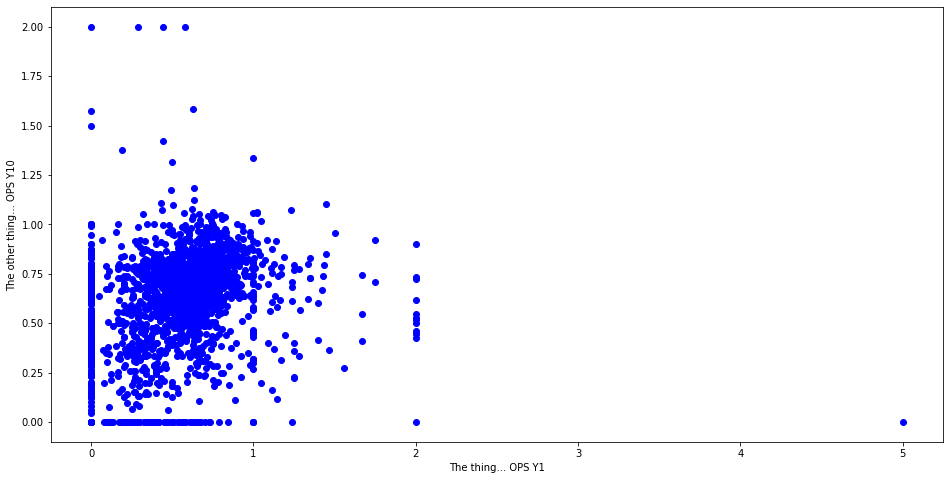

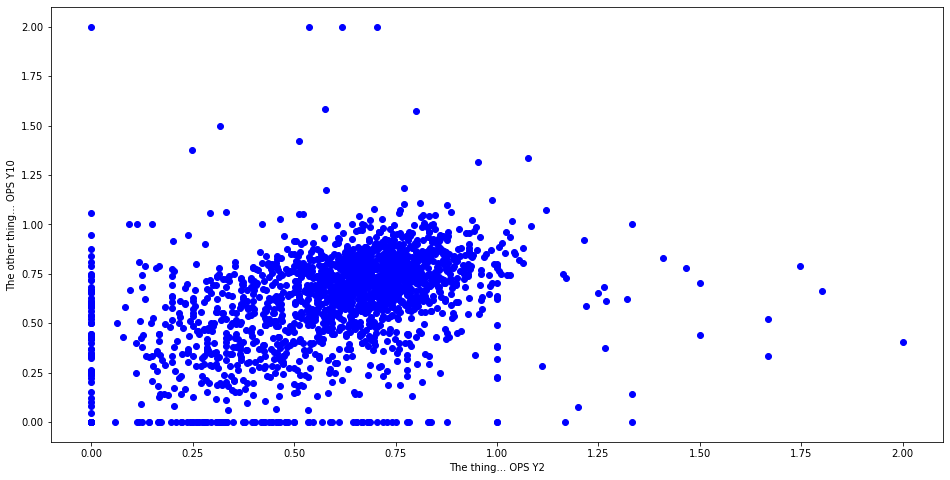

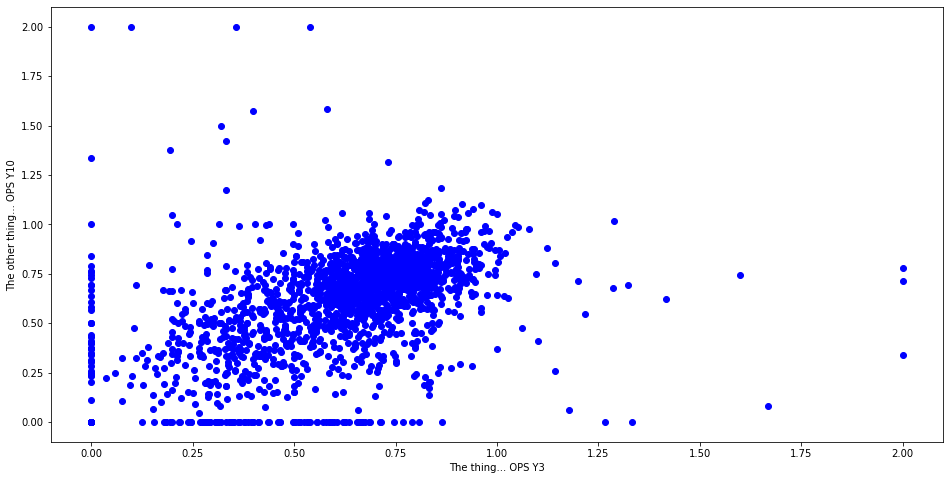

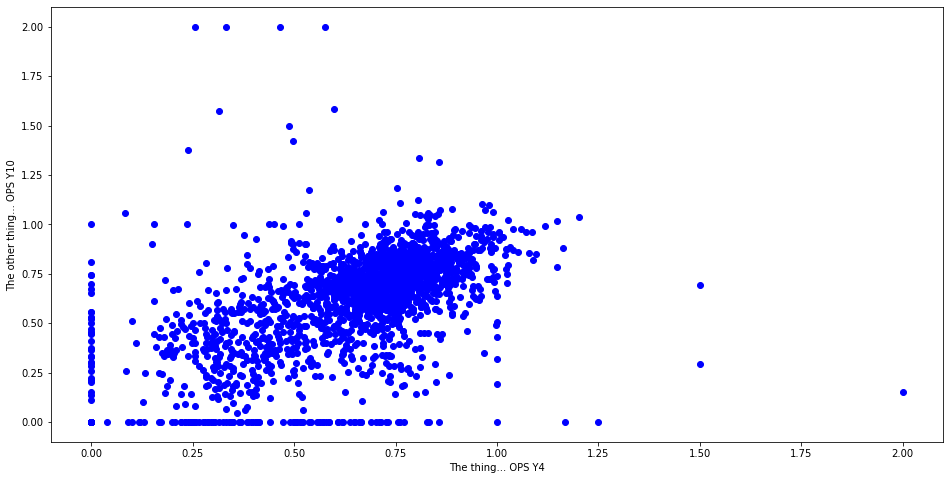

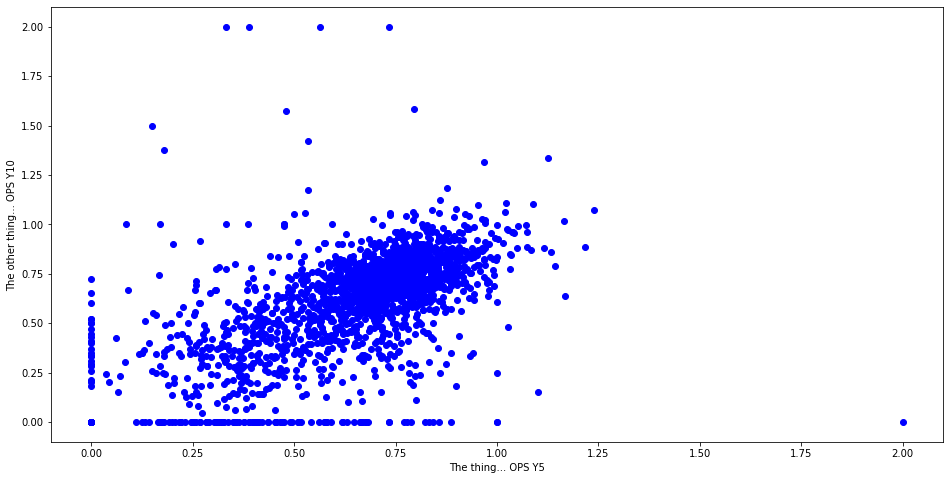

In [149]:
scatter_plot('OPS Y1', 'OPS Y10')
scatter_plot('OPS Y2', 'OPS Y10')
scatter_plot('OPS Y3', 'OPS Y10')
scatter_plot('OPS Y4', 'OPS Y10')
scatter_plot('OPS Y5', 'OPS Y10')

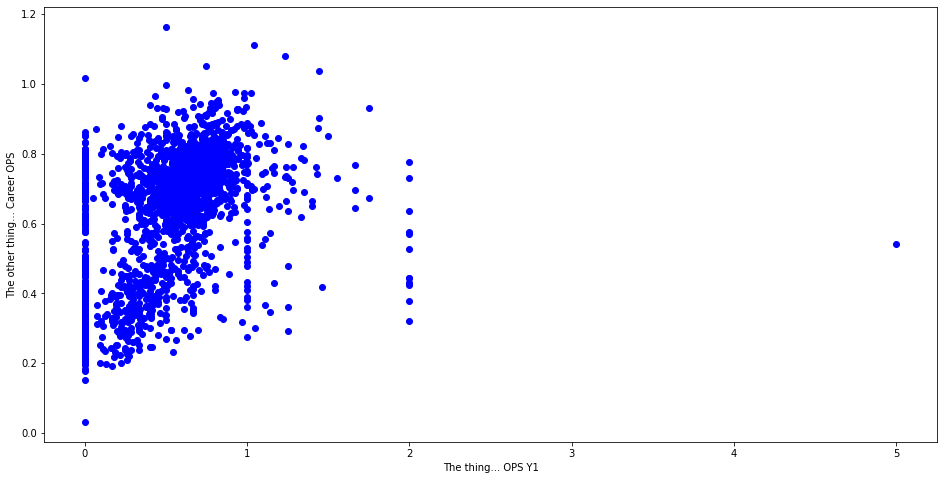

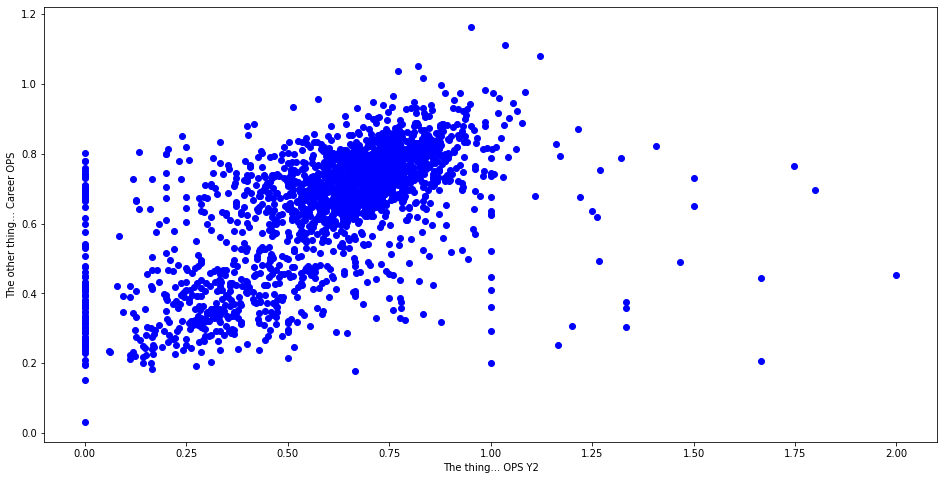

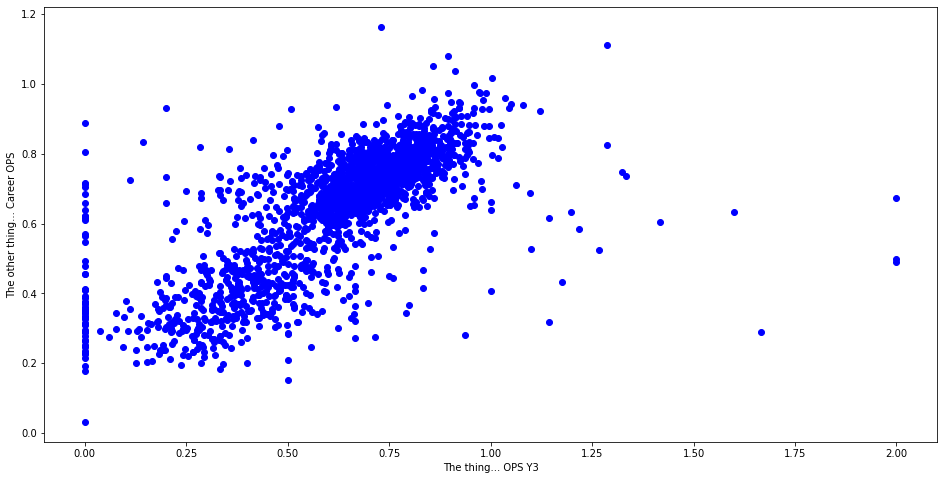

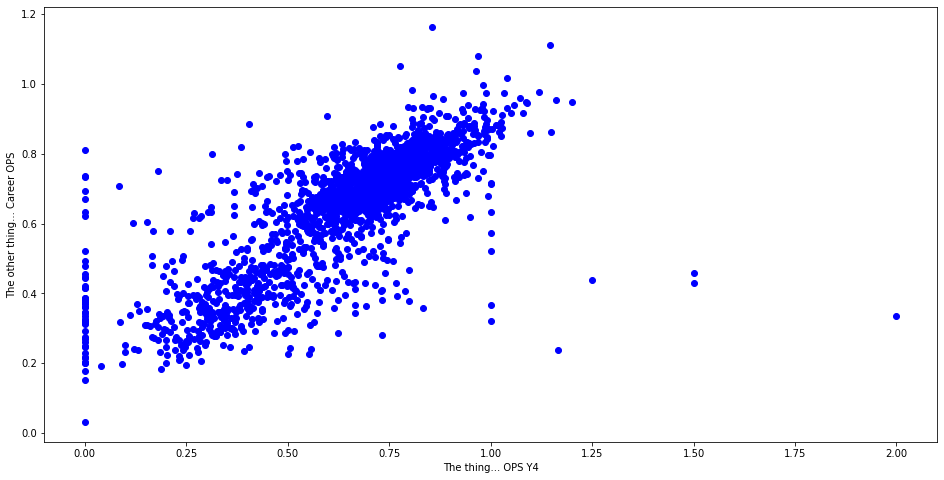

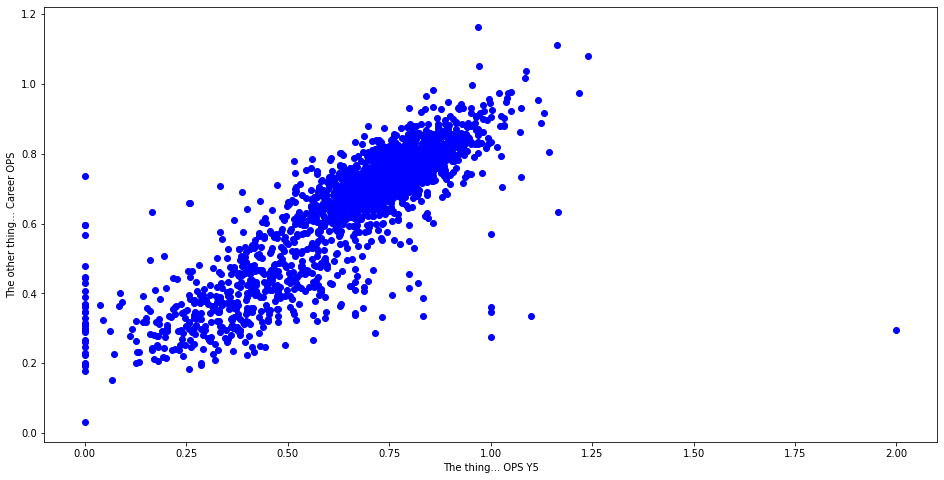

In [148]:
scatter_plot('OPS Y1', 'Career OPS')
scatter_plot('OPS Y2', 'Career OPS')
scatter_plot('OPS Y3', 'Career OPS')
scatter_plot('OPS Y4', 'Career OPS')
scatter_plot('OPS Y5', 'Career OPS')

In [150]:
focus_on = ['ID', 'Player', 'Career OPS', 'OPS Y3', 'OPS Y4', 'OPS Y5', 'OPS Y10'] 
pre_2000_ops_focused = pre_2000[focus_on]
pre_2000_ops_focused

,ID,Player,Career OPS,OPS Y3,OPS Y4,OPS Y5,OPS Y10
0,willeed01,Ed Willett,0.526511,0.367510,0.496266,0.379030,0.533333
1,daussho01,Hooks Dauss,0.553158,0.578379,0.470550,0.731898,0.634387
2,coopewi01,Wilbur Cooper,0.579987,0.462535,0.260180,0.455696,0.611333
3,mamaual01,Al Mamaux,0.465279,0.363387,0.473844,0.475806,0.991071
4,ruthba01,Babe Ruth,1.163687,0.730611,0.856730,0.967903,1.313417
...,...,...,...,...,...,...,...
1991,berkmla01,Lance Berkman,0.942939,1.050683,0.982479,0.927351,0.986336
1992,burnea.01,A.J. Burnett,0.317491,0.215385,0.370402,0.476190,0.000000
1993,garcifr03,Freddy Garcia,0.356818,0.285714,0.833333,0.400000,0.000000
1994,weaveje01,Jeff Weaver,0.477750,0.000000,0.571429,0.496781,0.400000


In [156]:
X = pre_2000_ops_focused[['OPS Y3', 'OPS Y4', 'OPS Y5']]
X

,OPS Y3,OPS Y4,OPS Y5
0,0.367510,0.496266,0.379030
1,0.578379,0.470550,0.731898
2,0.462535,0.260180,0.455696
3,0.363387,0.473844,0.475806
4,0.730611,0.856730,0.967903
...,...,...,...
1991,1.050683,0.982479,0.927351
1992,0.215385,0.370402,0.476190
1993,0.285714,0.833333,0.400000
1994,0.000000,0.571429,0.496781


In [157]:
X = X.values
X

array([[0.36751027, 0.49626623, 0.37903   ],
       [0.57837942, 0.47055016, 0.73189763],
       [0.46253469, 0.2601798 , 0.4556962 ],
       ...,
       [0.28571429, 0.83333333, 0.4       ],
       [0.        , 0.57142857, 0.49678068],
       [0.72438852, 0.64776292, 0.78901761]])

In [159]:
y = pre_2000_ops_focused[['Career OPS']]
y

,Career OPS
0,0.526511
1,0.553158
2,0.579987
3,0.465279
4,1.163687
...,...
1991,0.942939
1992,0.317491
1993,0.356818
1994,0.477750


In [160]:
y = y.values
y

array([[0.52651137],
       [0.55315806],
       [0.57998739],
       ...,
       [0.35681818],
       [0.47775045],
       [0.74385874]])

In [5]:
focus_on = ['ID', 'Player', 'PA', 'Number of Seasons', 'Career OPS', 'OPS Y1', 'OPS Y2', 'OPS Y3', 'OPS Y4', 'OPS Y5', 'OPS Y10'] 
pre_2000_ops_focused = pre_2000[focus_on]
pre_2000_ops_focused

,ID,Player,PA,Number of Seasons,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y10
0,willeed01,Ed Willett,704,10,0.526511,0.000000,0.219780,0.367510,0.496266,0.379030,0.533333
1,daussho01,Hooks Dauss,1324,15,0.553158,1.000000,0.560802,0.578379,0.470550,0.731898,0.634387
2,coopewi01,Wilbur Cooper,1320,15,0.579987,0.368132,0.219780,0.462535,0.260180,0.455696,0.611333
3,mamaual01,Al Mamaux,466,12,0.465279,0.000000,0.550000,0.363387,0.473844,0.475806,0.991071
4,ruthba01,Babe Ruth,10624,22,1.163687,0.500000,0.952325,0.730611,0.856730,0.967903,1.313417
...,...,...,...,...,...,...,...,...,...,...,...
1991,berkmla01,Lance Berkman,7814,15,0.942939,0.707851,0.949396,1.050683,0.982479,0.927351,0.986336
1992,burnea.01,A.J. Burnett,575,17,0.317491,0.235294,0.877143,0.215385,0.370402,0.476190,0.000000
1993,garcifr03,Freddy Garcia,99,13,0.356818,0.500000,1.333333,0.285714,0.833333,0.400000,0.000000
1994,weaveje01,Jeff Weaver,239,10,0.477750,1.250000,0.000000,0.000000,0.571429,0.496781,0.400000


In [6]:
ops3 = ['OPS Y1', 'OPS Y2', 'OPS Y3']
X3 = pre_2000_ops_focused[ops3]
X3

,OPS Y1,OPS Y2,OPS Y3
0,0.000000,0.219780,0.367510
1,1.000000,0.560802,0.578379
2,0.368132,0.219780,0.462535
3,0.000000,0.550000,0.363387
4,0.500000,0.952325,0.730611
...,...,...,...
1991,0.707851,0.949396,1.050683
1992,0.235294,0.877143,0.215385
1993,0.500000,1.333333,0.285714
1994,1.250000,0.000000,0.000000


In [7]:
X3 = X3.values
X3

array([[0.        , 0.21978022, 0.36751027],
       [1.        , 0.56080216, 0.57837942],
       [0.36813187, 0.21978022, 0.46253469],
       ...,
       [0.5       , 1.33333333, 0.28571429],
       [1.25      , 0.        , 0.        ],
       [0.76011615, 0.69793548, 0.72438852]])

OPS5

In [8]:
ops5 = ['OPS Y1', 'OPS Y2', 'OPS Y3', 'OPS Y4', 'OPS Y5']
X5 = pre_2000_ops_focused[ops5]
X5

,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5
0,0.000000,0.219780,0.367510,0.496266,0.379030
1,1.000000,0.560802,0.578379,0.470550,0.731898
2,0.368132,0.219780,0.462535,0.260180,0.455696
3,0.000000,0.550000,0.363387,0.473844,0.475806
4,0.500000,0.952325,0.730611,0.856730,0.967903
...,...,...,...,...,...
1991,0.707851,0.949396,1.050683,0.982479,0.927351
1992,0.235294,0.877143,0.215385,0.370402,0.476190
1993,0.500000,1.333333,0.285714,0.833333,0.400000
1994,1.250000,0.000000,0.000000,0.571429,0.496781


In [9]:
X5 = X5.values
X5

array([[0.        , 0.21978022, 0.36751027, 0.49626623, 0.37903   ],
       [1.        , 0.56080216, 0.57837942, 0.47055016, 0.73189763],
       [0.36813187, 0.21978022, 0.46253469, 0.2601798 , 0.4556962 ],
       ...,
       [0.5       , 1.33333333, 0.28571429, 0.83333333, 0.4       ],
       [1.25      , 0.        , 0.        , 0.57142857, 0.49678068],
       [0.76011615, 0.69793548, 0.72438852, 0.64776292, 0.78901761]])

In [10]:
ops_pred610c = ['OPS Y6', 'OPS Y10', 'Career OPS']
y610c = pre_2000[ops_pred610c]
y610c

,OPS Y6,OPS Y10,Career OPS
0,0.774655,0.533333,0.526511
1,0.400920,0.634387,0.553158
2,0.519551,0.611333,0.579987
3,0.000000,0.991071,0.465279
4,1.114268,1.313417,1.163687
...,...,...,...
1991,1.015958,0.986336,0.942939
1992,0.275862,0.000000,0.317491
1993,0.000000,0.000000,0.356818
1994,0.507143,0.400000,0.477750


In [11]:
y610c = y610c.values
y610c

array([[0.77465536, 0.53333333, 0.52651137],
       [0.40091954, 0.63438735, 0.55315806],
       [0.51955108, 0.61133342, 0.57998739],
       ...,
       [0.        , 0.        , 0.35681818],
       [0.50714286, 0.4       , 0.47775045],
       [0.817684  , 0.71434791, 0.74385874]])

In [12]:
ops_pred4 = ['OPS Y4']
y4 = pre_2000_ops_focused[ops_pred4]
y4

,OPS Y4
0,0.496266
1,0.470550
2,0.260180
3,0.473844
4,0.856730
...,...
1991,0.982479
1992,0.370402
1993,0.833333
1994,0.571429


In [13]:
y4 = y4.values
y4

array([[0.49626623],
       [0.47055016],
       [0.2601798 ],
       ...,
       [0.83333333],
       [0.57142857],
       [0.64776292]])

In [14]:
ops_pred4510 = ['OPS Y4', 'OPS Y5', 'OPS Y10']
y4510 = pre_2000_ops_focused[ops_pred4510]
y4510

,OPS Y4,OPS Y5,OPS Y10
0,0.496266,0.379030,0.533333
1,0.470550,0.731898,0.634387
2,0.260180,0.455696,0.611333
3,0.473844,0.475806,0.991071
4,0.856730,0.967903,1.313417
...,...,...,...
1991,0.982479,0.927351,0.986336
1992,0.370402,0.476190,0.000000
1993,0.833333,0.400000,0.000000
1994,0.571429,0.496781,0.400000


In [15]:
y4510 = y4510.values
y4510

array([[0.49626623, 0.37903   , 0.53333333],
       [0.47055016, 0.73189763, 0.63438735],
       [0.2601798 , 0.4556962 , 0.61133342],
       ...,
       [0.83333333, 0.4       , 0.        ],
       [0.57142857, 0.49678068, 0.4       ],
       [0.64776292, 0.78901761, 0.71434791]])

## For independent test data

In [16]:
from_2000_ops_focused = from_2000[focus_on]
from_2000_ops_focused

,ID,Player,PA,Number of Seasons,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y10
0,pierrju01,Juan Pierre,8280,14,0.703779,0.673488,0.793087,0.675184,0.733904,0.780886,0.757490
1,nadyxa01,Xavier Nady,3241,12,0.754615,2.000000,0.711731,0.716789,0.759777,0.790246,0.646219
2,moellch01,Chad Moeller,1539,11,0.639602,0.534307,0.627880,0.851913,0.769733,0.568145,0.751334
3,schnebr01,Brian Schneider,3570,13,0.688698,0.563379,0.859248,0.798068,0.702540,0.724134,0.626961
4,wellski01,Kip Wells,371,11,0.467588,0.000000,0.333333,0.460317,0.482310,0.541456,0.181818
...,...,...,...,...,...,...,...,...,...,...,...
398,perezhe01,Hernan Perez,1846,10,0.661951,1.000000,0.444664,0.533333,0.583502,0.730326,0.195489
399,gomesya01,Yan Gomes,3274,10,0.720084,0.630983,0.825949,0.784906,0.658537,0.527451,0.722537
400,simmoan01,Andrelton Simmons,4731,10,0.682697,0.750827,0.691599,0.617196,0.659624,0.689723,0.557754
401,mercejo03,Jordy Mercer,3416,10,0.700599,0.635674,0.771547,0.692806,0.613224,0.701352,0.671493


In [17]:
from_2000_career = from_2000[['ID', 'Player', 'Career OPS', 'OPS Y1', 'OPS Y2', 'OPS Y3', 'OPS Y4', 'OPS Y5', 'OPS Y6', 'OPS Y10']]
from_2000_career

,ID,Player,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y6,OPS Y10
0,pierrju01,Juan Pierre,0.703779,0.673488,0.793087,0.675184,0.733904,0.780886,0.679930,0.757490
1,nadyxa01,Xavier Nady,0.754615,2.000000,0.711731,0.716789,0.759777,0.790246,0.805425,0.646219
2,moellch01,Chad Moeller,0.639602,0.534307,0.627880,0.851913,0.769733,0.568145,0.623844,0.751334
3,schnebr01,Brian Schneider,0.688698,0.563379,0.859248,0.798068,0.702540,0.724134,0.739263,0.626961
4,wellski01,Kip Wells,0.467588,0.000000,0.333333,0.460317,0.482310,0.541456,0.400484,0.181818
...,...,...,...,...,...,...,...,...,...,...
398,perezhe01,Hernan Perez,0.661951,1.000000,0.444664,0.533333,0.583502,0.730326,0.703826,0.195489
399,gomesya01,Yan Gomes,0.720084,0.630983,0.825949,0.784906,0.658537,0.527451,0.707728,0.722537
400,simmoan01,Andrelton Simmons,0.682697,0.750827,0.691599,0.617196,0.659624,0.689723,0.751810,0.557754
401,mercejo03,Jordy Mercer,0.700599,0.635674,0.771547,0.692806,0.613224,0.701352,0.732539,0.671493


## Models...

#### OPS-3 predicting Y4 OPS

In [100]:



# Print size of the dataset
print("dataset dimensions: {}".format(X3.shape)) 

# Import linear regression and loss (mean_squared_error) from Sklearn package
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y4, test_size = 0.2, random_state = 42)


# Build a linear regression object
LinReg = LinearRegression()

# Fit a linear regression model
LinReg.fit(X_train, y_train)

y_predict = LinReg.predict(X_test)



# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

# Calculate r--squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

# calculate adjusted r--squared
k = len(LinReg.coef_)+1
n = len(y_test)
Adjusted_r2 = 1- ((1-r2)*(n-1) / (n-k-1) )

# print intercept and coefficients
print("The intercept of the fitted model is: %.3f" % LinReg.intercept_)
#print("The coefficients of the model are:\n" , [float('{:.3f}'.format(x)) for x in LinReg.coef_ ])

coeffs = []
for x in LinReg.coef_:
    coeffs.append(x)
    
print("The coefficients of the model are:\n", coeffs)


print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))
print('Adjusted R-Squared is %.3f' % (Adjusted_r2))

dataset dimensions: (1996, 3)
The intercept of the fitted model is: 0.190
The coefficients of the model are:
 [array([0.07789985, 0.19743204, 0.46528272])]
The performance of the model
--------------------------------------
MAE is 0.112
RMSE is 0.171
R-Squared is 0.353
Adjusted R-Squared is 0.350


In [101]:
np.mean(y_predict)


0.6436717170821673

## X and y for OPS-3 using averages

In [20]:
ops3_plus = ['OPS Y1', 'OPS Y2', 'OPS Y3', 'AVG Y1', 'AVG Y2', 'AVG Y3' ]
X3_plus = pre_2000[ops3_plus].values
X3_plus

array([[0.        , 0.21978022, 0.36751027, 0.        , 0.07692308,
        0.1641791 ],
       [1.        , 0.56080216, 0.57837942, 0.25      , 0.17721519,
        0.21649485],
       [0.36813187, 0.21978022, 0.46253469, 0.15384615, 0.07692308,
        0.20652174],
       ...,
       [0.5       , 1.33333333, 0.28571429, 0.25      , 0.66666667,
        0.14285714],
       [1.25      , 0.        , 0.        , 0.5       , 0.        ,
        0.        ],
       [0.76011615, 0.69793548, 0.72438852, 0.27941176, 0.24105012,
        0.25386313]])

In [102]:
import pandas as pd
import numpy as np


# Print size of the dataset
print("dataset dimensions: {}".format(X3_plus.shape)) 

# Import linear regression and loss (mean_squared_error) from Sklearn package
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3_plus, y4, test_size = 0.2, random_state = 42)


# Build a linear regression object
LinReg = LinearRegression()

# Fit a linear regression model
LinReg.fit(X_train, y_train)

y_predict = LinReg.predict(X_test)



# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

# Calculate r--squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

# calculate adjusted r--squared
k = len(LinReg.coef_)+1
n = len(y_test)
Adjusted_r2 = 1- ((1-r2)*(n-1) / (n-k-1) )

# print intercept and coefficients
print("The intercept of the fitted model is: %.3f" % LinReg.intercept_)

coeffs = []
for x in LinReg.coef_:
    coeffs.append(x)
    
print("The coefficients of the model are:\n", coeffs)


print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))
print('Adjusted R-Squared is %.3f' % (Adjusted_r2))

dataset dimensions: (1996, 6)
The intercept of the fitted model is: 0.214
The coefficients of the model are:
 [array([ 0.1034422 ,  0.32288395,  0.77477714, -0.08956074, -0.36750794,
       -0.88150655])]
The performance of the model
--------------------------------------
MAE is 0.110
RMSE is 0.168
R-Squared is 0.372
Adjusted R-Squared is 0.369


In [103]:
np.mean(y_predict)


0.6437297436963454

4510

In [106]:
# Print size of the dataset
print("dataset dimensions: {}".format(X3.shape)) 

# Import linear regression and loss (mean_squared_error) from Sklearn package
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, y4510, test_size = 0.2, random_state = 42)


# Build a linear regression object
LinReg = LinearRegression()

# Fit a linear regression model
LinReg.fit(X_train, y_train)

y_predict = LinReg.predict(X_test)



# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

# Calculate r--squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

# calculate adjusted r--squared
k = len(LinReg.coef_)+1
n = len(y_test)
Adjusted_r2 = 1- ((1-r2)*(n-1) / (n-k-1) )

# print intercept and coefficients
# print("The intercept of the fitted model is: %.3f" % LinReg.intercept_)

# coeffs = []
# for x in LinReg.coef_:
#     coeffs.append(x)
    
# print("The coefficients of the model are:\n", coeffs)


print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))
print('Adjusted R-Squared is %.3f' % (Adjusted_r2))

dataset dimensions: (1996, 3)
The performance of the model
--------------------------------------
MAE is 0.129
RMSE is 0.190
R-Squared is 0.331
Adjusted R-Squared is 0.324


In [24]:
y_predict

array([[0.55001115, 0.55611356, 0.52584169],
       [0.91824109, 0.91913897, 0.86536026],
       [0.78814808, 0.79998394, 0.77343465],
       ...,
       [0.62978581, 0.62223257, 0.58443999],
       [0.48658673, 0.5008462 , 0.4459767 ],
       [0.72362583, 0.72771215, 0.68345481]])

In [25]:
y_test

array([[0.60148976, 0.44649621, 0.55042735],
       [1.03259288, 1.21675077, 0.88475274],
       [0.7146759 , 0.84023465, 0.72683012],
       ...,
       [0.83630031, 0.80103638, 0.68282828],
       [0.69070513, 0.75149077, 0.80986938],
       [0.76431466, 0.69238805, 0.70809376]])

In [108]:
np.mean(y_predict)


0.639033187075322

In [26]:
# Print size of the dataset
print("dataset dimensions: {}".format(X5.shape)) 

# Import linear regression and loss (mean_squared_error) from Sklearn package
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X5, y610c, test_size = 0.2, random_state = 42)


# Build a linear regression object
LinReg = LinearRegression()

# Fit a linear regression model
LinReg.fit(X_train, y_train)

y_predict = LinReg.predict(X_test)



# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

# Calculate r--squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

# calculate adjusted r--squared
k = len(LinReg.coef_)+1
n = len(y_test)
Adjusted_r2 = 1- ((1-r2)*(n-1) / (n-k-1) )

# print intercept and coefficients
# print("The intercept of the fitted model is: %.3f" % LinReg.intercept_)

# coeffs = []
# for x in LinReg.coef_:
#     coeffs.append(x)
    
# print("The coefficients of the model are:\n", coeffs)


print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))
print('Adjusted R-Squared is %.3f' % (Adjusted_r2))

dataset dimensions: (1996, 5)
The performance of the model
--------------------------------------
MAE is 0.095
RMSE is 0.154
R-Squared is 0.609
Adjusted R-Squared is 0.605


In [27]:
y_test

array([[0.62600502, 0.55042735, 0.60280427],
       [1.06089582, 0.88475274, 0.97404439],
       [0.85451152, 0.72683012, 0.7945162 ],
       ...,
       [0.8408054 , 0.68282828, 0.77247351],
       [0.7075176 , 0.80986938, 0.71003844],
       [0.80099274, 0.70809376, 0.72399678]])

In [28]:
y_predict

array([[0.53916746, 0.49629127, 0.52371754],
       [1.05086976, 0.99981968, 1.04113919],
       [0.79747239, 0.77263992, 0.79210866],
       ...,
       [0.74714829, 0.69463251, 0.72647821],
       [0.63394459, 0.58222442, 0.62099093],
       [0.73182027, 0.67907525, 0.71835238]])

### Other models...

#### Lasso

In [30]:
from sklearn.linear_model import MultiTaskLasso

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt


lasso_model = MultiTaskLasso().fit(X_train, y_train)
y_predict = lasso_model.predict(X_test)
y_predict

array([[0.65521054, 0.61294853, 0.64549741],
       [0.65521054, 0.61294853, 0.64549741],
       [0.65521054, 0.61294853, 0.64549741],
       ...,
       [0.65521054, 0.61294853, 0.64549741],
       [0.65521054, 0.61294853, 0.64549741],
       [0.65521054, 0.61294853, 0.64549741]])

In [31]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

# Calculate r--squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

# calculate adjusted r--squared
k = len(LinReg.coef_)+1
n = len(y_test)
Adjusted_r2 = 1- ((1-r2)*(n-1) / (n-k-1) )

# print intercept and coefficients
# print("The intercept of the fitted model is: %.3f" % LinReg.intercept_)

# coeffs = []
# for x in LinReg.coef_:
#     coeffs.append(x)
    
# print("The coefficients of the model are:\n", coeffs)


print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))
print('Adjusted R-Squared is %.3f' % (Adjusted_r2))

The performance of the model
--------------------------------------
MAE is 0.173
RMSE is 0.228
R-Squared is -0.001
Adjusted R-Squared is -0.011


#### Lasso CV

In [33]:
from numpy import arange
from sklearn.linear_model import LassoCV, MultiTaskLassoCV
from sklearn.model_selection import RepeatedKFold


#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
#lassoCV_model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

# lassoCV_model = LassoCV().fit(X_train, y_train)
# lassoCV_model.predict(X_test)


lassoCV_model = MultiTaskLassoCV(cv=5).fit(X_train, y_train)
y_predict = lassoCV_model.predict(X_test)
y_predict

#fit model
#lassoCV_model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
#print(model.alpha_)


array([[0.54239611, 0.49943446, 0.52799784],
       [1.04162441, 0.99008904, 1.03150018],
       [0.79477649, 0.76562414, 0.7886231 ],
       ...,
       [0.7461746 , 0.69418566, 0.72728205],
       [0.63508948, 0.58612432, 0.6227826 ],
       [0.72964348, 0.67782658, 0.71662991]])

In [34]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

# Calculate r--squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

# calculate adjusted r--squared
k = len(LinReg.coef_)+1
n = len(y_test)
Adjusted_r2 = 1- ((1-r2)*(n-1) / (n-k-1) )

# print intercept and coefficients
# print("The intercept of the fitted model is: %.3f" % LinReg.intercept_)

# coeffs = []
# for x in LinReg.coef_:
#     coeffs.append(x)
    
# print("The coefficients of the model are:\n", coeffs)


print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))
print('Adjusted R-Squared is %.3f' % (Adjusted_r2))

The performance of the model
--------------------------------------
MAE is 0.095
RMSE is 0.154
R-Squared is 0.606
Adjusted R-Squared is 0.602


#### Gradient Regressor Booster - takes a longer time

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

params = {'n_estimators': 5000, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2
         }

#GRB_model = GradientBoostingRegressor().fit(X_train, y_train)
#GRB_model.predict(X_test)

GRB_model = MultiOutputRegressor(GradientBoostingRegressor(**params)).fit(X_train, y_train)
y_predict = GRB_model.predict(X_test)
y_predict

array([[0.27838582, 0.32097472, 0.49660693],
       [0.99351128, 0.83984641, 0.93924969],
       [0.80338714, 0.64357348, 0.83407458],
       ...,
       [0.83166064, 0.74104016, 0.80086046],
       [0.76634867, 0.60315831, 0.68370578],
       [0.73905406, 0.7335694 , 0.7132922 ]])

In [36]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

# Calculate r--squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

# calculate adjusted r--squared
k = len(LinReg.coef_)+1
n = len(y_test)
Adjusted_r2 = 1- ((1-r2)*(n-1) / (n-k-1) )

# print intercept and coefficients
# print("The intercept of the fitted model is: %.3f" % LinReg.intercept_)

# coeffs = []
# for x in LinReg.coef_:
#     coeffs.append(x)
    
# print("The coefficients of the model are:\n", coeffs)


print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))
print('Adjusted R-Squared is %.3f' % (Adjusted_r2))

The performance of the model
--------------------------------------
MAE is 0.111
RMSE is 0.179
R-Squared is 0.474
Adjusted R-Squared is 0.469


#### Ridge???

In [37]:
ridge_model = Ridge().fit(X_train,y_train)
y_predict = ridge_model.predict(X_test)
y_predict

array([[0.53965435, 0.49701255, 0.52430229],
       [1.04844899, 0.99720985, 1.03867614],
       [0.79690762, 0.77170665, 0.7914351 ],
       ...,
       [0.74549318, 0.6932331 , 0.7249776 ],
       [0.63291635, 0.58123379, 0.61999932],
       [0.73160284, 0.67906256, 0.7182038 ]])

In [38]:
y_test

array([[0.62600502, 0.55042735, 0.60280427],
       [1.06089582, 0.88475274, 0.97404439],
       [0.85451152, 0.72683012, 0.7945162 ],
       ...,
       [0.8408054 , 0.68282828, 0.77247351],
       [0.7075176 , 0.80986938, 0.71003844],
       [0.80099274, 0.70809376, 0.72399678]])

In [39]:
# Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)

# Calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))

# Calculate r--squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)

# calculate adjusted r--squared
k = len(LinReg.coef_)+1
n = len(y_test)
Adjusted_r2 = 1- ((1-r2)*(n-1) / (n-k-1) )

# print intercept and coefficients
# print("The intercept of the fitted model is: %.3f" % LinReg.intercept_)

# coeffs = []
# for x in LinReg.coef_:
#     coeffs.append(x)
    
# print("The coefficients of the model are:\n", coeffs)


print("The performance of the model")
print("--------------------------------------")
print('MAE is %.3f' % (mae))
print('RMSE is %.3f' % (rmse))
print('R-Squared is %.3f' % (r2))
print('Adjusted R-Squared is %.3f' % (Adjusted_r2))

The performance of the model
--------------------------------------
MAE is 0.095
RMSE is 0.154
R-Squared is 0.608
Adjusted R-Squared is 0.604


### My Test with My Data....

In [95]:
# y_my_test = from_2000_career[['OPS Y6', 'OPS Y10', 'Career OPS']]
# y_my_test

In [41]:
X_my_test = from_2000_career[['OPS Y1', 'OPS Y2', 'OPS Y3', 'OPS Y4', 'OPS Y5']]
X_my_test

,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5
0,0.673488,0.793087,0.675184,0.733904,0.780886
1,2.000000,0.711731,0.716789,0.759777,0.790246
2,0.534307,0.627880,0.851913,0.769733,0.568145
3,0.563379,0.859248,0.798068,0.702540,0.724134
4,0.000000,0.333333,0.460317,0.482310,0.541456
...,...,...,...,...,...
398,1.000000,0.444664,0.533333,0.583502,0.730326
399,0.630983,0.825949,0.784906,0.658537,0.527451
400,0.750827,0.691599,0.617196,0.659624,0.689723
401,0.635674,0.771547,0.692806,0.613224,0.701352


In [94]:
# names_my_test = from_2000_career[['Player']]
# names_my_test

'''
Miguel Cabrera
Albert Pujols
Ichiro Suzuki
Robinson Cano
Sandy Leon
'''


In [93]:
my_player_list = pd.DataFrame()


my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Miguel Cabrera']],
                          ignore_index=True)

my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Albert Pujols']],
                           ignore_index=True)

my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Ichiro Suzuki']],
                           ignore_index=True)

my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Robinson Cano']],
                           ignore_index=True)

my_player_list = pd.concat([my_player_list, from_2000_career[from_2000_career['Player'] == 'Sandy Leon']],
                           ignore_index=True)

my_player_list

,ID,Player,Career OPS,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5,OPS Y6,OPS Y10
0,cabremi01,Miguel Cabrera,0.919604,0.792714,0.878861,0.946576,0.998182,0.965215,0.886753,0.999223
1,pujolal01,Albert Pujols,0.918688,1.013132,0.955091,1.106083,1.071834,1.039137,1.101627,1.010538
2,suzukic01,Ichiro Suzuki,0.756883,0.838119,0.812625,0.787736,0.869019,0.786003,0.786000,0.753514
3,canoro01,Robinson Cano,0.843899,0.777707,0.889788,0.841138,0.715283,0.871255,0.914293,0.835736
4,leonsa01,Sandy Leon,0.595935,0.722222,0.000000,0.447321,0.439459,0.845366,0.644244,0.504770


In [96]:
y_my_test = my_player_list[['OPS Y6', 'OPS Y10', 'Career OPS']]
y_my_test

,OPS Y6,OPS Y10,Career OPS
0,0.886753,0.999223,0.919604
1,1.101627,1.010538,0.918688
2,0.786000,0.753514,0.756883
3,0.914293,0.835736,0.843899
4,0.644244,0.504770,0.595935


In [97]:
X_my_test = my_player_list[['OPS Y1', 'OPS Y2', 'OPS Y3', 'OPS Y4', 'OPS Y5']]
X_my_test

,OPS Y1,OPS Y2,OPS Y3,OPS Y4,OPS Y5
0,0.792714,0.878861,0.946576,0.998182,0.965215
1,1.013132,0.955091,1.106083,1.071834,1.039137
2,0.838119,0.812625,0.787736,0.869019,0.786003
3,0.777707,0.889788,0.841138,0.715283,0.871255
4,0.722222,0.000000,0.447321,0.439459,0.845366


In [98]:
predict_my_test = LinReg.predict(X_my_test.values)
predict_my_test

#clf_1.predict(X_2000_1.values)

array([[0.93471302, 0.8792312 , 0.92228711],
       [1.02295639, 0.95347066, 1.00783015],
       [0.80825192, 0.75901237, 0.79921642],
       [0.82395924, 0.77213579, 0.81292602],
       [0.60213714, 0.55475937, 0.58992492]])

In [99]:
y_my_test

,OPS Y6,OPS Y10,Career OPS
0,0.886753,0.999223,0.919604
1,1.101627,1.010538,0.918688
2,0.786000,0.753514,0.756883
3,0.914293,0.835736,0.843899
4,0.644244,0.504770,0.595935
